# Figures for supplementary material: </br> Visualize the evolution of the species in function of time or PV for the autoignition dataset

In [1]:
import os

#add the root directory
os.chdir('../')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import pandas as pd
import h5py
import matplotlib.ticker as ticker
from matplotlib.ticker import ScalarFormatter
import matplotlib.cm as cm
from loader import *

## Load dataset

In [3]:
filename_autoignition = "isochoric-adiabatic-closed-HR-H2-air-lin_Z_0.015_0.035_100-T0_900-"
path_data_autoignition = "data-files/autoignition/"
path_data = "data-files/"

mixture_fractions_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fraction.csv") #1 x nbr_timesteps
mixture_fractions_test = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}mixture-fractions-test-trajectories.csv") #1 x nbr_test_trajectories
state_space_names = np.genfromtxt(f"{path_data_autoignition}{filename_autoignition}state-space-names.csv", delimiter=",", dtype=str)
state_space_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space.csv", names = state_space_names)
state_space_source_train = pd.read_csv(f"{path_data_autoignition}{filename_autoignition}state-space-sources.csv", names = state_space_names)
time_train = np.loadtxt(f"{path_data_autoignition}{filename_autoignition}time.csv") #1 x nbr_timesteps

## Visualize H2O2 for different timescales
### Effect of epsilon when applying the log on H2O2

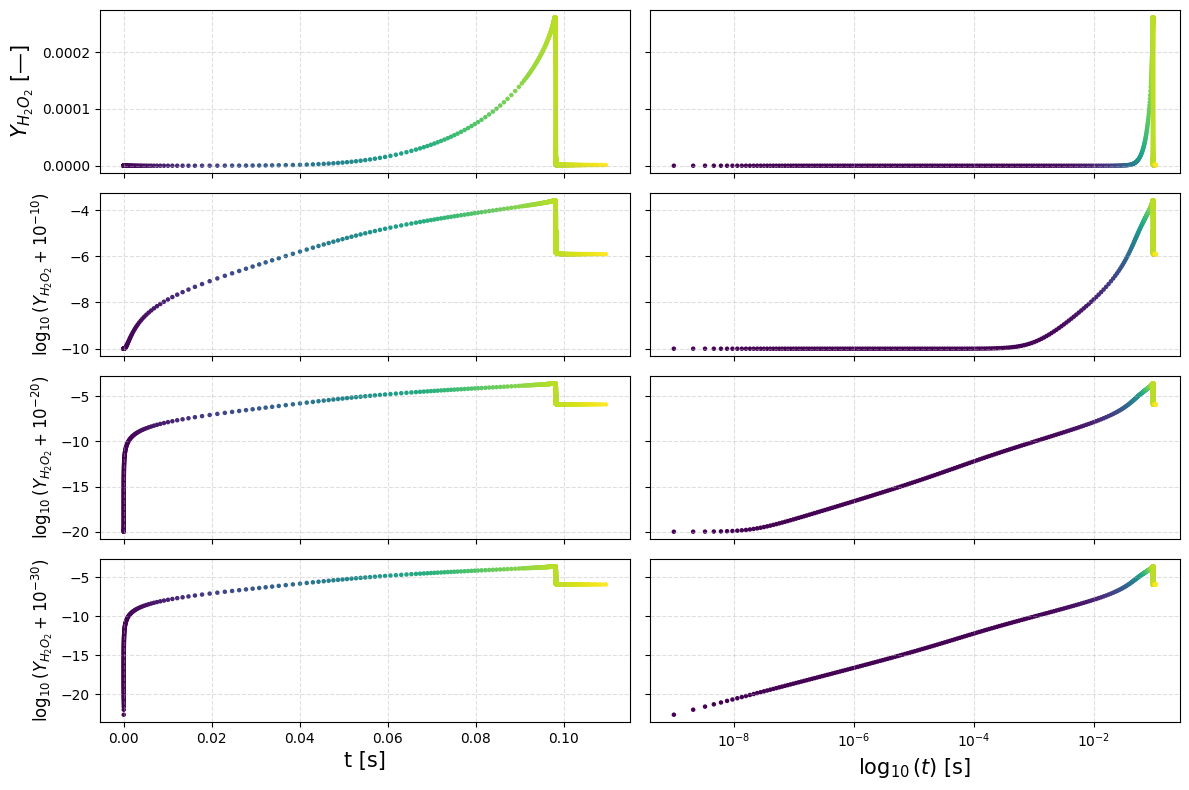

In [4]:
save = False
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs time/"
name = f"H2O2_overTime_differentScales_colourTime.png"

nbr_test_trajectory = 4
rows, cols = 4,2

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))  # Define the grid
axes = axes.flatten()

species_to_inspect = ['H2O2']
idx_species = 0
species_label = species_to_inspect[idx_species].replace("2", "_{2}")

addLogArray = [0, 0, 1e-10, 1e-10, 1e-20, 1e-20, 1e-30, 1e-30]

#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns = state_space_names)


#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

# remove first point which has t=0s
test_trajectory_time_nonzero = test_trajectory_time[test_trajectory_time > 0]
test_trajectory_nonzero = test_trajectory[test_trajectory_time > 0]
    
for idxFig in range(rows*cols):

    addLog = addLogArray[idxFig]

    if(addLog == 0):
        speciesTraj = test_trajectory_nonzero[species_to_inspect[idx_species]]
    elif(addLog > 0):
        speciesTraj = np.log10(test_trajectory_nonzero[species_to_inspect[idx_species]] + addLog)
    
    ax = axes[idxFig]
    ax.scatter(test_trajectory_time_nonzero, speciesTraj, c = test_trajectory_time_nonzero, s = 5)
    #ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=2))

    if(idxFig%2 == 0 and idxFig>=(rows-1)*cols):
        ax.set_xlabel("t [s]", fontsize = 15)
    elif((idxFig+1)%2 == 0):
        ax.set_xscale("log")
        #ax.set_xlim([test_trajectory_time.min(), test_trajectory_time.max()])
        if(idxFig>=(rows-1)*cols):
            ax.set_xlabel("$\log_{10}(t)$ [s]", fontsize = 15)
        else:
            ax.set_xticklabels([])
    else:
            ax.set_xticklabels([])

    if(idxFig%cols == 0):
        if(idxFig < cols):
            ax.set_ylabel(f"$Y_{{{species_label}}}$ [\u2014]", fontsize = 15)
        else:
            ax.set_ylabel(f"$\log_{{{10}}}(Y_{{{species_label}}} + 10^{{{int(np.log10(addLog))}}})$", fontsize = 12)
    else:
        ax.set_yticklabels([])

    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300)

plt.show()

### Combine plots together

C:\Windows\Temp\ipykernel_25912\1915203137.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reds = cm.get_cmap('Reds')


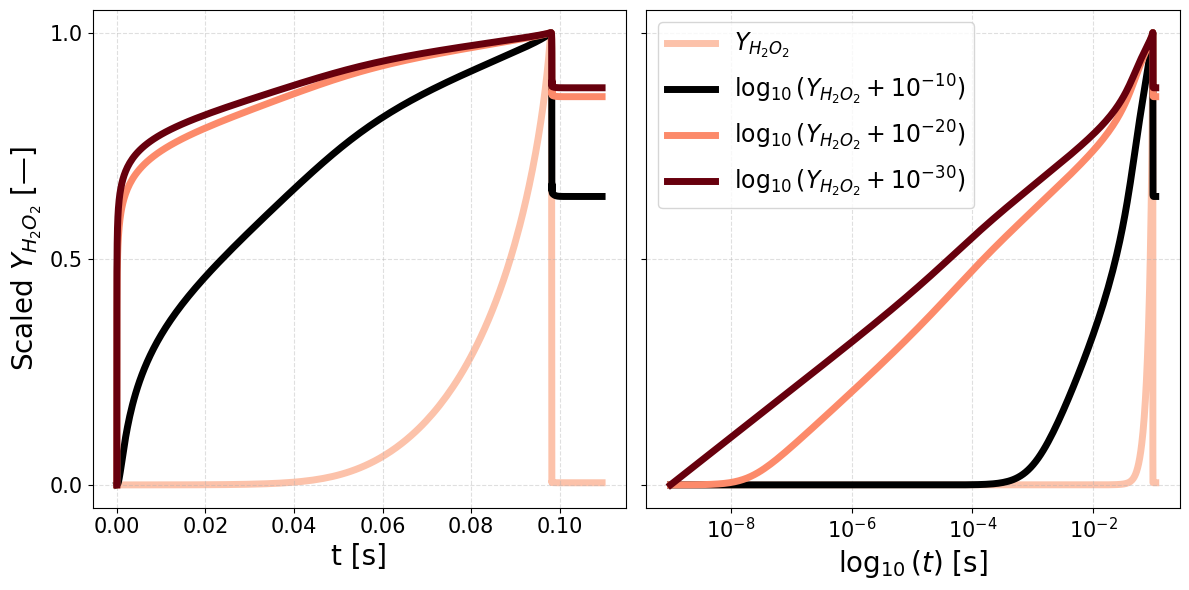

In [5]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs time/"
name = f"H2O2_overTime_differentScales_together_colourTime - other colors.png"
namePdf = f"H2O2_overTime_differentScales_together_colourTime - other colors.pdf"

nbr_test_trajectory = 4
rows, cols = 1,2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  # Define the grid
axes = axes.flatten()

species_to_inspect = ['H2O2']
idx_species = 0
species_label = species_to_inspect[idx_species].replace("2", "_{2}")

reds = cm.get_cmap('Reds')

addLogArray = [0, 0, 1e-10, 1e-10, 1e-20, 1e-20, 1e-30, 1e-30]
linewidthArray = [5, 5, 5, 5, 5, 5, 5, 5]
greyArray = [reds(0.23), reds(0.23), "k", "k", reds(0.4), reds(0.4), reds(1.0), reds(1.0)] #reds(0.42), reds(0.42), reds(0.6), reds(0.6)
zorderArray = [1, 1, 2, 2, 3, 3, 4, 4]

#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns = state_space_names)


#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

# remove first point which has t=0s
test_trajectory_time_nonzero = test_trajectory_time[test_trajectory_time > 0]
test_trajectory_nonzero = test_trajectory[test_trajectory_time > 0]

legend_handles = []
    
for idxFig in range(int(len(addLogArray)/2)*cols):

    addLog = addLogArray[idxFig]

    if(addLog == 0):
        speciesTraj = test_trajectory_nonzero[species_to_inspect[idx_species]]
        
    elif(addLog > 0):
        speciesTraj = np.log10(test_trajectory_nonzero[species_to_inspect[idx_species]] + addLog)

    speciesTraj_scaled = (speciesTraj - speciesTraj.min())/(speciesTraj.max() - speciesTraj.min())

    ax = axes[idxFig%2]
    line, = ax.plot(test_trajectory_time_nonzero, speciesTraj_scaled, c = greyArray[idxFig], linewidth = linewidthArray[idxFig], zorder = zorderArray[idxFig])
    ax.set_yticks([0, 0.5, 1])
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)

    if(idxFig%2 == 0 and idxFig>=(rows-1)*cols):
        ax.set_xlabel("t [s]", fontsize = 20)
    elif((idxFig+1)%2 == 0):
        ax.set_xscale("log")
        #ax.set_xlim([test_trajectory_time.min(), test_trajectory_time.max()])
        if(idxFig>=(rows-1)*cols):
            ax.set_xlabel("$\log_{10}(t)$ [s]", fontsize = 20)
        else:
            ax.set_xticklabels([])
        
        if idxFig < cols:
            label = f"$Y_{{{species_label}}}$"
        else:
            log_offset = int(np.log10(addLog))
            label = f"$\log_{{10}}(Y_{{{species_label}}} + 10^{{{log_offset}}})$"
        legend_handles.append((line, label))
    else:
            ax.set_xticklabels([])

    if(idxFig%cols == 0):
        ax.set_ylabel(f"Scaled $Y_{{{species_label}}}$ [\u2014]", fontsize = 20)
    else:
        ax.set_yticklabels([])

    ax.grid(True, linestyle='--', alpha=0.4)

if legend_handles:
    handles, labels = zip(*legend_handles)
    axes[1].legend(handles, labels, fontsize=17, loc="best", frameon=True)

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300)
    plt.savefig(pathSave + namePdf)
plt.show()

#### See what is happening at the end of the trajectory for log(H2O2)

C:\Windows\Temp\ipykernel_30248\2225129896.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reds = cm.get_cmap('Reds')


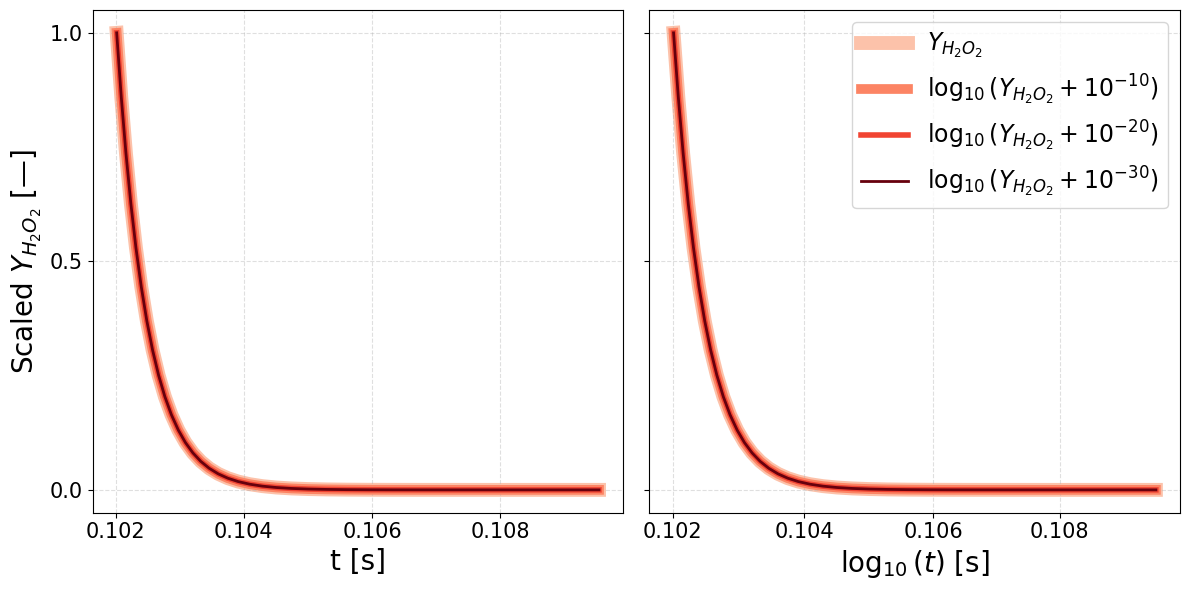

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs time/"
name = f"H2O2_overTime_endOfTraj_differentScales_together_colourTime - red.png"

nbr_test_trajectory = 4
rows, cols = 1,2

fig, axes = plt.subplots(rows, cols, figsize=(12, 6))  # Define the grid
axes = axes.flatten()

species_to_inspect = ['H2O2']
idx_species = 0
species_label = species_to_inspect[idx_species].replace("2", "_{2}")

reds = cm.get_cmap('Reds')

addLogArray = [0, 0, 1e-10, 1e-10, 1e-20, 1e-20, 1e-30, 1e-30]
linewidthArray = [10, 10, 7, 7, 4, 4, 2, 2]
greyArray = [reds(0.23), reds(0.23), "k", "k", reds(0.4), reds(0.4), reds(1.0), reds(1.0)] #reds(0.42), reds(0.42), reds(0.6), reds(0.6)
zorderArray = [1, 1, 2, 2, 3, 3, 4, 4]

#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns = state_space_names)


#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

# remove first point which has t=0s
test_trajectory_time_nonzero = test_trajectory_time[test_trajectory_time > 0.102]
test_trajectory_nonzero = test_trajectory[test_trajectory_time > 0.102]

legend_handles = []
    
for idxFig in range(int(len(addLogArray)/2)*cols):

    addLog = addLogArray[idxFig]

    if(addLog == 0):
        speciesTraj = test_trajectory_nonzero[species_to_inspect[idx_species]]
        
    elif(addLog > 0):
        speciesTraj = np.log10(test_trajectory_nonzero[species_to_inspect[idx_species]] + addLog)

    speciesTraj_scaled = (speciesTraj - speciesTraj.min())/(speciesTraj.max() - speciesTraj.min())

    ax = axes[idxFig%2]
    line, = ax.plot(test_trajectory_time_nonzero, speciesTraj_scaled, c = greyArray[idxFig], linewidth = linewidthArray[idxFig], zorder = zorderArray[idxFig])
    ax.set_yticks([0, 0.5, 1])
    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)

    if(idxFig%2 == 0 and idxFig>=(rows-1)*cols):
        ax.set_xlabel("t [s]", fontsize = 20)
    elif((idxFig+1)%2 == 0):
        ax.set_xscale("log")
        if(idxFig>=(rows-1)*cols):
            ax.set_xlabel("$\log_{10}(t)$ [s]", fontsize = 20)
        else:
            ax.set_xticklabels([])
        
        if idxFig < cols:
            label = f"$Y_{{{species_label}}}$"
        else:
            log_offset = int(np.log10(addLog))
            label = f"$\log_{{10}}(Y_{{{species_label}}} + 10^{{{log_offset}}})$"
        legend_handles.append((line, label))
    else:
            ax.set_xticklabels([])

    ax.xaxis.set_minor_locator(ticker.NullLocator())
    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))

    if(idxFig%cols == 0):
        ax.set_ylabel(f"Scaled $Y_{{{species_label}}}$ [\u2014]", fontsize = 20)
    else:
        ax.set_yticklabels([])

    ax.grid(True, linestyle='--', alpha=0.4)

if legend_handles:
    handles, labels = zip(*legend_handles)
    axes[1].legend(handles, labels, fontsize=17, loc="best", frameon=True)

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300)

plt.show()

### Zoom in on last part of the trajectory

C:\Windows\Temp\ipykernel_25912\1858363626.py:6: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  reds = cm.get_cmap('Reds')


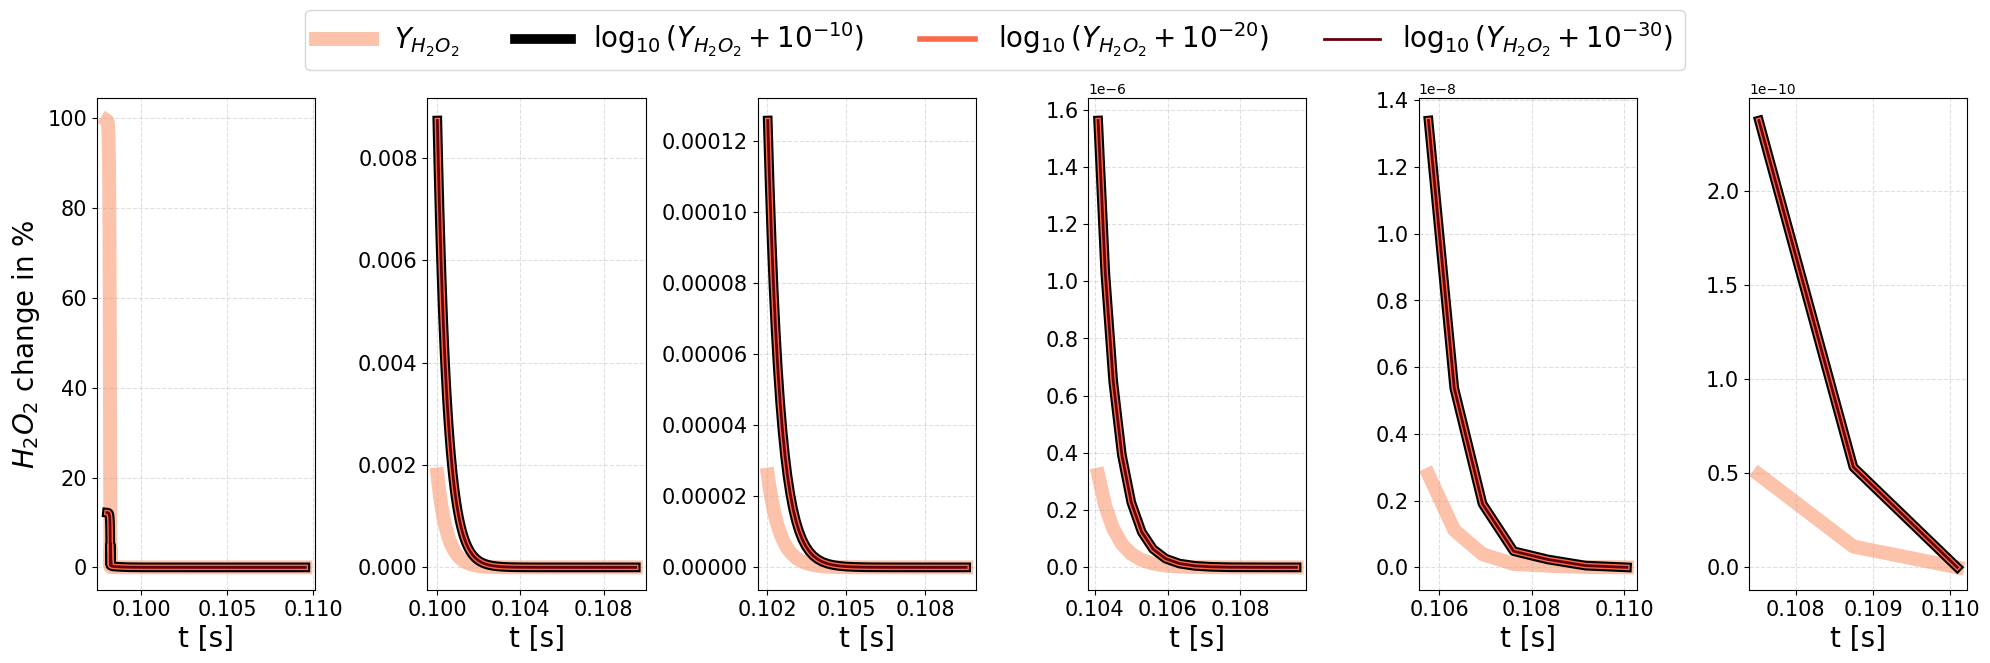

In [6]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs time/"
name = f"Scaled H2O2_overTime_endOfTraj_differentScales_together_colourTime - other colors.png"
name = f"Scaled H2O2_overTime_endOfTraj_differentScales_together_colourTime - other colors.pdf"

reds = cm.get_cmap('Reds')

addLogArray = [0, 1e-10, 1e-20, 1e-30]
linewidthArray = [10, 7, 4, 2]
greyArray = [reds(0.23), "k", reds(0.5), reds(1.0)] #[reds(0.23), reds(0.42), reds(0.6), reds(1.0)]
zorderArray = [1, 2, 3, 4]

timeCutoffArray = [0.098, 0.1, 0.102, 0.104, 0.106, 0.108]

nbr_test_trajectory = 4
rows, cols = 1,len(timeCutoffArray)

fig, axes = plt.subplots(rows, cols, figsize=(20, 6))  # Define the grid
axes = axes.flatten()

species_to_inspect = ['H2O2']
idx_species = 0
species_label = species_to_inspect[idx_species].replace("2", "_{2}")



#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns = state_space_names)


#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

# remove first point which has t=0s

legend_handles = []

for idxTimeCutoff, timeCutoff in enumerate(timeCutoffArray):

    test_trajectory_time_nonzero = test_trajectory_time[test_trajectory_time > timeCutoff]
    test_trajectory_nonzero = test_trajectory[test_trajectory_time > timeCutoff]


    ax = axes[idxTimeCutoff]

    for idxCurve, addLog in enumerate(addLogArray):

        if(addLog == 0):
            speciesTraj = test_trajectory_nonzero[species_to_inspect[idx_species]]
            scalespeciesTraj = test_trajectory[test_trajectory_time > 0][species_to_inspect[idx_species]].max() - test_trajectory[test_trajectory_time > 0][species_to_inspect[idx_species]].min()
        elif(addLog > 0):
            speciesTraj = np.log10(test_trajectory_nonzero[species_to_inspect[idx_species]] + addLog)
            scalespeciesTraj = np.abs(np.log10(test_trajectory[test_trajectory_time > 0][species_to_inspect[idx_species]]).max() - np.log10(test_trajectory[test_trajectory_time > 0][species_to_inspect[idx_species]]).min())

        #speciesTraj_scaled = (speciesTraj - speciesTraj.min())/(speciesTraj.max() - speciesTraj.min())
        speciesTraj_scaled = speciesTraj/scalespeciesTraj

        line, = ax.plot(test_trajectory_time_nonzero, (speciesTraj_scaled - speciesTraj_scaled.min())*100, c = greyArray[idxCurve], linewidth = linewidthArray[idxCurve], zorder = zorderArray[idxCurve])
        #ax.set_yticks([0, 0.5, 1])
        ax.tick_params(axis='y', labelsize=15)
        ax.tick_params(axis='x', labelsize=15)

        ax.set_xlabel("t [s]", fontsize = 20)

        if(idxTimeCutoff == 0):
            ax.set_ylabel(f"${species_label}$ change in %", fontsize = 20)
            if idxCurve == 0:
                label = f"$Y_{{{species_label}}}$"
            else:
                log_offset = int(np.log10(addLog))
                label = f"$\log_{{10}}(Y_{{{species_label}}} + 10^{{{log_offset}}})$"
            legend_handles.append((line, label))
        #ax.set_xticks([0.102, 0.104, 0.106, 0.108])
        ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
        ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
        
        ax.grid(True, linestyle='--', alpha=0.4)

if legend_handles:
    handles, labels = zip(*legend_handles)
    fig.legend(handles, labels, fontsize=20, ncol = 4, loc="upper center", bbox_to_anchor=(0.5, 1.12), frameon=True)

plt.tight_layout()
if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches = "tight")
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")

plt.show()

## Visualize the species vs the PV

C:\Windows\Temp\ipykernel_25912\1902996787.py:63: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


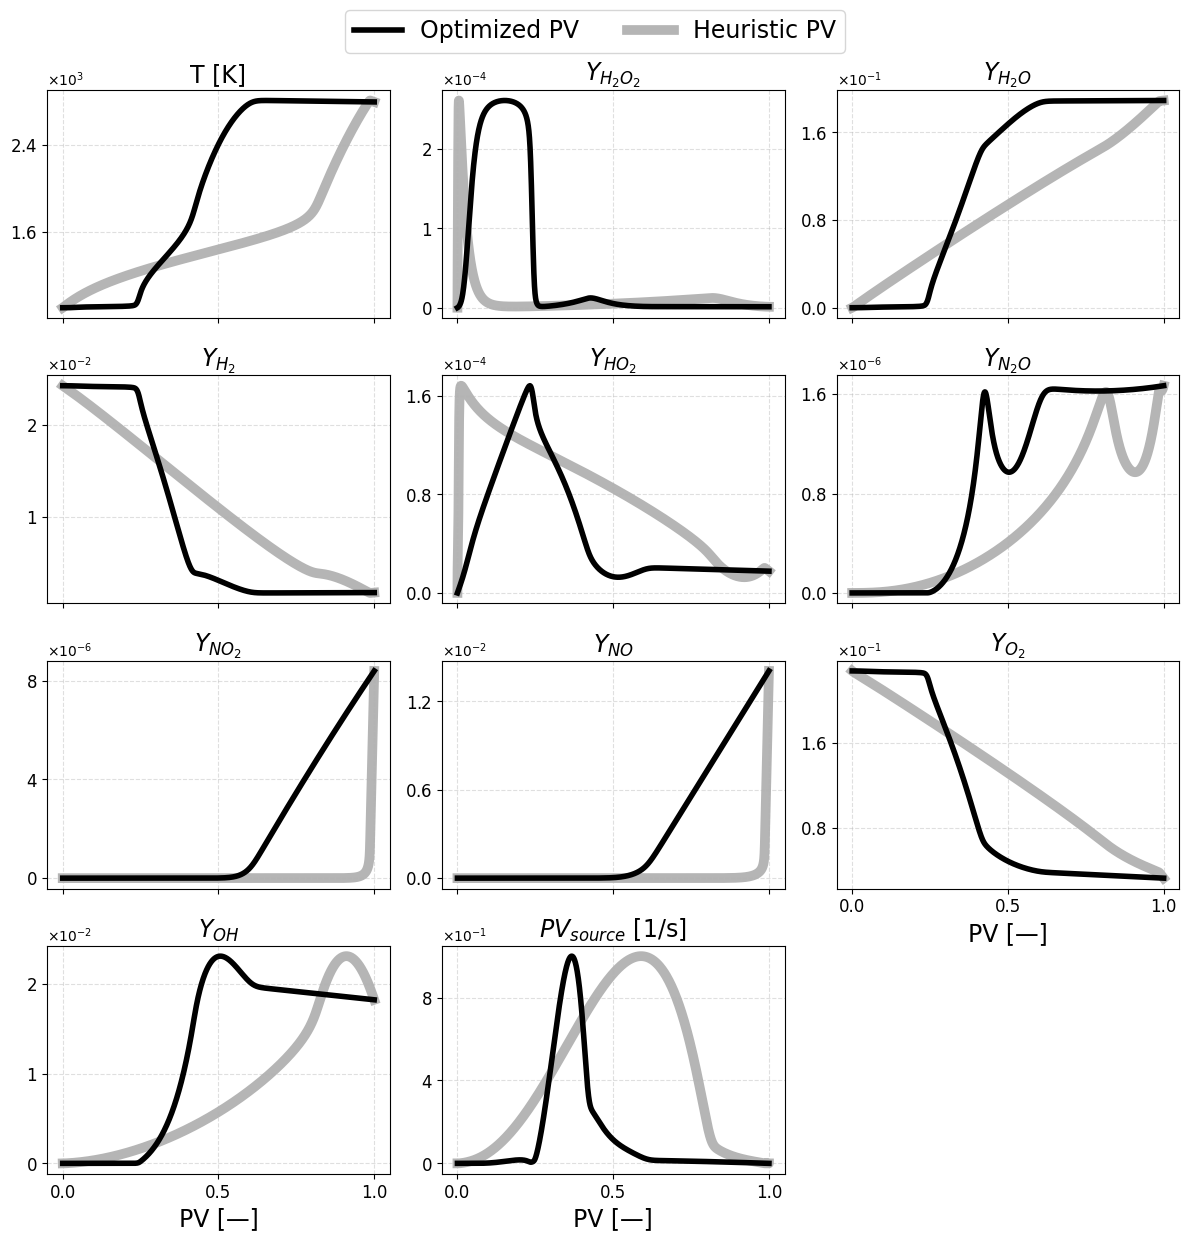

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Autoignition/species-PV/"
name = f"PV heuristic and optimized 0D-2q for different species - improved - black.png"
namePdf = f"PV heuristic and optimized 0D-2q for different species - improved - black.pdf"

species_to_inspect = ['T', 'H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'PV1']

rows, cols = 4, 3
idxTraj = 4



######################
# Model with log(H2O2)

filename_model = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s0"
filename_metadata = filename_model + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"
loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
id_model = loader.metadata["Training_id"]
model = loader.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model.encoder_species.weight.mul_(-1)


##################
# Import data


state_space_names_DNS = np.genfromtxt(f"{path_data}Xu-state-space-names.csv", delimiter=",", dtype=str)

#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{idxTraj}'][:], columns = state_space_names)
    PV_Xu_test = test_trajectory["H2O"] - test_trajectory["H2"] - test_trajectory["O2"]
    PV_Xu_test = (PV_Xu_test - PV_Xu_test.min()) / (PV_Xu_test.max() - PV_Xu_test.min())
    PV_Xu_test = PV_Xu_test.to_numpy()

    state_space_test_DNS = test_trajectory[state_space_names_DNS].to_numpy()
    PV_optimized_test = model.get_PV(torch.from_numpy(np.delete(state_space_test_DNS, idx_species_removed, axis=1))).detach().numpy()
    PV_optimized_test = (PV_optimized_test - PV_optimized_test.min())/(PV_optimized_test.max() - PV_optimized_test.min())

#test source terms
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-sources-test-trajectories.h5", 'r') as hf:
    test_trajectory_source = pd.DataFrame(hf[f'test_trajectory_{idxTraj}'][:], columns = state_space_names)

    PV_Xu_source_test = test_trajectory_source["H2O"] - test_trajectory_source["H2"] - test_trajectory_source["O2"]
    PV_Xu_source_test = (PV_Xu_source_test - PV_Xu_source_test.min()) / (PV_Xu_source_test.max() - PV_Xu_source_test.min())
    PV_Xu_source_test = PV_Xu_source_test.to_numpy()

    state_space_source_test_DNS = test_trajectory_source[state_space_names_DNS].to_numpy()
    PV_optimized_source_test = model.get_PV(torch.from_numpy(np.delete(state_space_source_test_DNS, idx_species_removed, axis=1))).detach().numpy()
    PV_optimized_source_test = (PV_optimized_source_test - PV_optimized_source_test.min()) / (PV_optimized_source_test.max() - PV_optimized_source_test.min())
    
greys = cm.get_cmap('Greys')

#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{idxTraj}'][:])

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Define the grid
axes = axes.flatten()

for idx_species in range(len(species_to_inspect)):

    ax = axes[idx_species]

    species_label = species_to_inspect[idx_species].replace("2", "_{2}").replace("1", "_{source}")

    if(idx_species == len(species_to_inspect)-1):
        trajSpecies = PV_Xu_source_test
        trajSpceciesOpt = PV_optimized_source_test
    else:
        trajSpecies = test_trajectory[species_to_inspect[idx_species]]
        trajSpceciesOpt = test_trajectory[species_to_inspect[idx_species]]
    
    ax.plot(PV_optimized_test, trajSpceciesOpt, linewidth = 4, label = "Optimized PV", zorder = 2, color = greys(1.0))
    ax.plot(PV_Xu_test, trajSpecies, linewidth = 7, linestyle = "-", label = "Heuristic PV", zorder = 1, color = greys(0.4))# color = "blue")
    
    if(species_to_inspect[idx_species] == "T"):
        ax.set_title(f"T [K]", fontsize = 17)
    elif(species_to_inspect[idx_species] == "PV1"):
        ax.set_title(f"${species_label}$ [1/s]", fontsize = 17)
    else:
        ax.set_title(f"$Y_{{{species_label}}}$", fontsize = 17)

    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([])

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

    if(idx_species>=len(species_to_inspect)-cols):
        ax.set_xlabel(f"PV [\u2014]", fontsize = 17)
    else:
        ax.set_xticklabels([])

    for j in range(len(species_to_inspect), len(axes)):
        axes[j].axis("off")
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((0, 0))  # Always use scientific notation
    ax.yaxis.set_major_formatter(formatter)

    ax.grid(True, linestyle='--', alpha=0.4)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=17, frameon=True, bbox_to_anchor=(0.5, 1.04), markerscale=8)

plt.tight_layout(h_pad=0)

if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches = "tight")
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")
plt.show()

## Visualize evolution of species for different optimized PVs and heuristic PV

C:\Windows\Temp\ipykernel_25912\3408588067.py:117: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


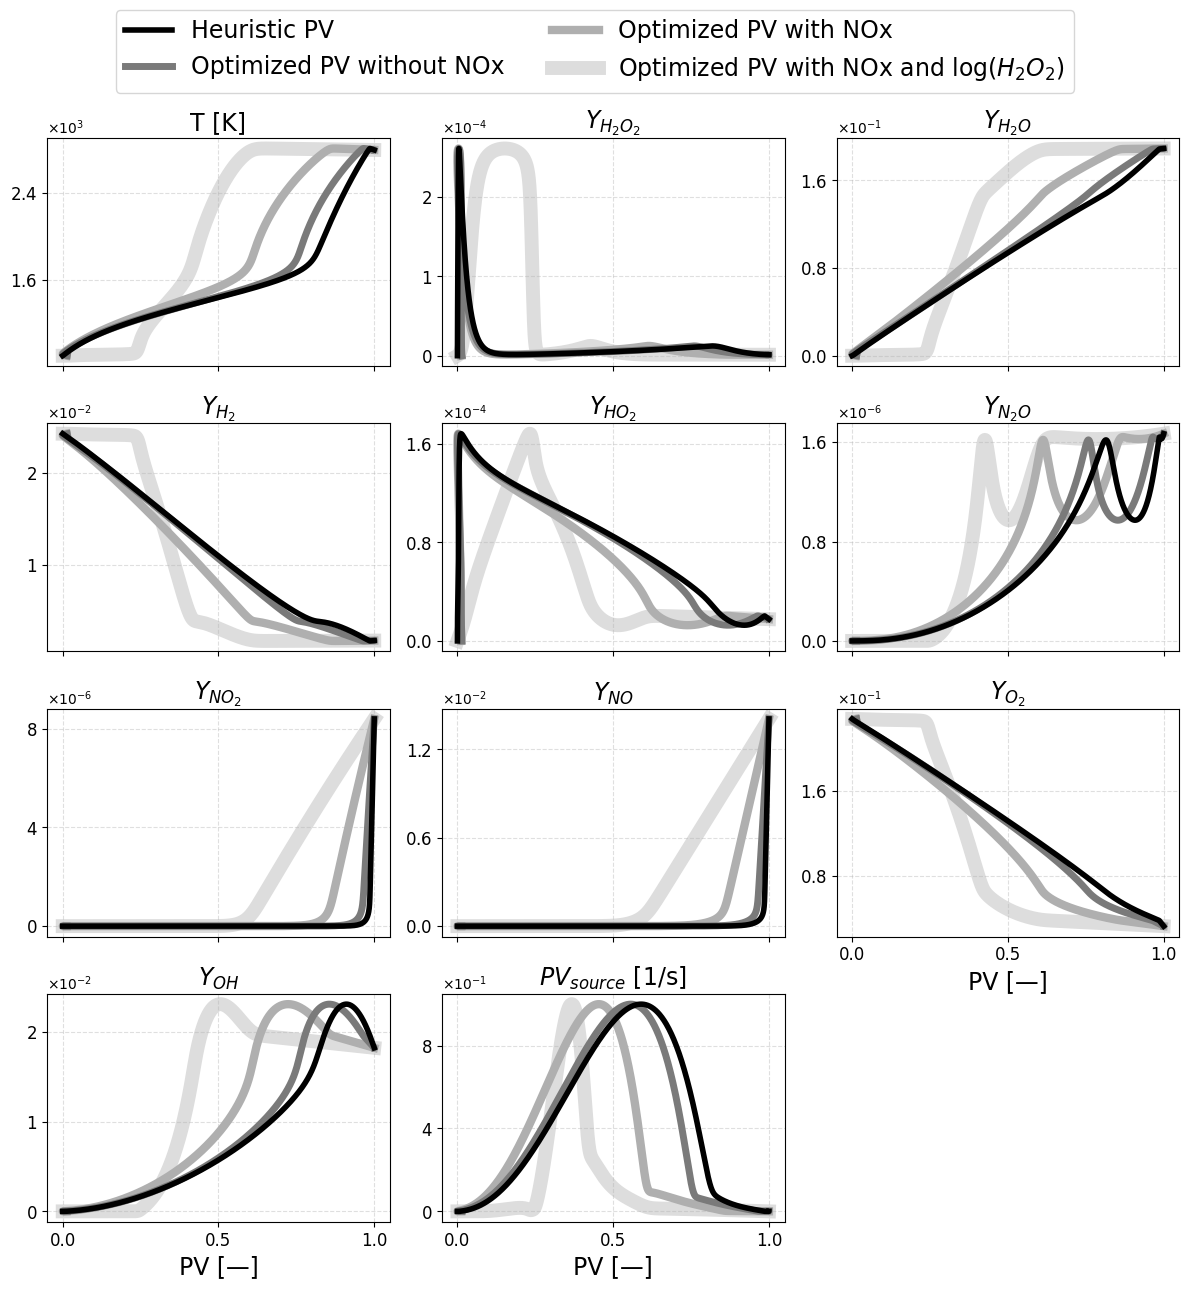

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs PV/"
name = f"PV heuristic and optimized 0D-2q, 0D-2h and 0D-2v for different species - invColor.png"
namePdf = f"PV heuristic and optimized 0D-2q, 0D-2h and 0D-2v for different species - invColor.pdf"

species_to_inspect = ['T', 'H2O2', 'H2O', 'H2', 'HO2', 'N2O', 'NO2', 'NO', 'O2', 'OH', 'PV1']

rows, cols = 4, 3
idxTraj = 4



######################
# Model with log(H2O2)

filename_model = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_14Mar2025-hour_14h23_Tr0D-2q_s0"
filename_metadata = filename_model + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"
loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
id_model = loader.metadata["Training_id"]
model = loader.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model.encoder_species.weight.mul_(-1)

######################
# Model with NOx

filename_model = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_18Feb2025-hour_22h58_Tr0D-2h_s0"
filename_metadata = filename_model + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"
loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed_withNOx = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
id_model = loader.metadata["Training_id"]
model_withNOx = loader.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model_withNOx.encoder_species.weight.mul_(-1)


######################
# Model without NOx

filename_model = "Xu-AE-opt_adam-epo_100000-lr_0.025-date_15Apr2025-hour_15h37_Tr0D-2v_s0"
filename_metadata = filename_model + "_metadata.pkl"
path_metadata = "metadata/"
filename_species_names = "Xu-state-space-names.csv"
path_data = "data-files/"
loader = loadData(filename_species_names, path_metadata, filename_metadata)
idx_species_removed_withoutNOx = loader.metadata["list idx species removed source"] if loader.metadata["dataset_type"].startswith("autoignition_augm") else loader.metadata["idx species removed"]
id_model = loader.metadata["Training_id"]
model_withoutNOx = loader.loadModel()

weight_inversion = True
if(weight_inversion):
    with torch.no_grad():  # Ensures we do not track gradients for this operation
        model_withoutNOx.encoder_species.weight.mul_(-1)


##################
# Import data

state_space_names_DNS = np.genfromtxt(f"{path_data}Xu-state-space-names.csv", delimiter=",", dtype=str)

#test state space
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{idxTraj}'][:], columns = state_space_names)
    PV_Xu_test = test_trajectory["H2O"] - test_trajectory["H2"] - test_trajectory["O2"]
    PV_Xu_test = (PV_Xu_test - PV_Xu_test.min()) / (PV_Xu_test.max() - PV_Xu_test.min())
    PV_Xu_test = PV_Xu_test.to_numpy()

    state_space_test_DNS = test_trajectory[state_space_names_DNS].to_numpy()

    PV_optimized_test = model.get_PV(torch.from_numpy(np.delete(state_space_test_DNS, idx_species_removed, axis=1))).detach().numpy()
    PV_optimized_test = (PV_optimized_test - PV_optimized_test.min())/(PV_optimized_test.max() - PV_optimized_test.min())

    PV_optimized_test_withNOx = model_withNOx.get_PV(torch.from_numpy(np.delete(state_space_test_DNS, idx_species_removed_withNOx, axis=1))).detach().numpy()
    PV_optimized_test_withNOx = (PV_optimized_test_withNOx - PV_optimized_test_withNOx.min())/(PV_optimized_test_withNOx.max() - PV_optimized_test_withNOx.min())

    PV_optimized_test_withoutNOx = model_withoutNOx.get_PV(torch.from_numpy(np.delete(state_space_test_DNS, idx_species_removed_withoutNOx, axis=1))).detach().numpy()
    PV_optimized_test_withoutNOx = (PV_optimized_test_withoutNOx - PV_optimized_test_withoutNOx.min())/(PV_optimized_test_withoutNOx.max() - PV_optimized_test_withoutNOx.min())

#test source terms
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-sources-test-trajectories.h5", 'r') as hf:
    test_trajectory_source = pd.DataFrame(hf[f'test_trajectory_{idxTraj}'][:], columns = state_space_names)

    PV_Xu_source_test = test_trajectory_source["H2O"] - test_trajectory_source["H2"] - test_trajectory_source["O2"]
    PV_Xu_source_test = (PV_Xu_source_test - PV_Xu_source_test.min()) / (PV_Xu_source_test.max() - PV_Xu_source_test.min())
    PV_Xu_source_test = PV_Xu_source_test.to_numpy()

    state_space_source_test_DNS = test_trajectory_source[state_space_names_DNS].to_numpy()

    PV_optimized_source_test = model.get_PV(torch.from_numpy(np.delete(state_space_source_test_DNS, idx_species_removed, axis=1))).detach().numpy()
    PV_optimized_source_test = (PV_optimized_source_test - PV_optimized_source_test.min()) / (PV_optimized_source_test.max() - PV_optimized_source_test.min())

    PV_optimized_source_test_withNOx = model_withNOx.get_PV(torch.from_numpy(np.delete(state_space_source_test_DNS, idx_species_removed_withNOx, axis=1))).detach().numpy()
    PV_optimized_source_test_withNOx = (PV_optimized_source_test_withNOx - PV_optimized_source_test_withNOx.min()) / (PV_optimized_source_test_withNOx.max() - PV_optimized_source_test_withNOx.min())

    PV_optimized_source_test_withoutNOx = model_withoutNOx.get_PV(torch.from_numpy(np.delete(state_space_source_test_DNS, idx_species_removed_withoutNOx, axis=1))).detach().numpy()
    PV_optimized_source_test_withoutNOx = (PV_optimized_source_test_withoutNOx - PV_optimized_source_test_withoutNOx.min()) / (PV_optimized_source_test_withoutNOx.max() - PV_optimized_source_test_withoutNOx.min())
    

#test time trajectories
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{idxTraj}'][:])

greys = cm.get_cmap('Greys')

fig, axes = plt.subplots(rows, cols, figsize=(12, 12))  # Define the grid
axes = axes.flatten()

for idx_species in range(len(species_to_inspect)):

    ax = axes[idx_species]

    species_label = species_to_inspect[idx_species].replace("2", "_{2}").replace("1", "_{source}")

    if(idx_species == len(species_to_inspect)-1):
        trajSpecies = PV_Xu_source_test
        trajSpceciesOpt = PV_optimized_source_test
        trajSpceciesOpt_withNOx = PV_optimized_source_test_withNOx
        trajSpceciesOpt_withoutNOx = PV_optimized_source_test_withoutNOx
    else:
        trajSpecies = test_trajectory[species_to_inspect[idx_species]]
        trajSpceciesOpt = test_trajectory[species_to_inspect[idx_species]]
        trajSpceciesOpt_withNOx = test_trajectory[species_to_inspect[idx_species]]
        trajSpceciesOpt_withoutNOx = test_trajectory[species_to_inspect[idx_species]]
    
    ax.plot(PV_Xu_test, trajSpecies, linewidth=4, label = "Heuristic PV", color=greys(1.0), zorder=4)
    ax.plot(PV_optimized_test_withoutNOx, trajSpceciesOpt_withoutNOx, linewidth=5, label = "Optimized PV without NOx", color=greys(0.6), zorder=3)
    ax.plot(PV_optimized_test_withNOx, trajSpceciesOpt_withNOx, linewidth=6, label = "Optimized PV with NOx", color=greys(0.42), zorder=2)
    ax.plot(PV_optimized_test, trajSpceciesOpt, linewidth=10, label = "Optimized PV with NOx and log($H_2O_2$)", color=greys(0.23), zorder = 1)

    if(species_to_inspect[idx_species] == "T"):
        ax.set_title(f"T [K]", fontsize = 17)
    elif(species_to_inspect[idx_species] == "PV1"):
        ax.set_title(f"${species_label}$ [1/s]", fontsize = 17)
    else:
        ax.set_title(f"$Y_{{{species_label}}}$", fontsize = 17)
        
    ax.set_xticks([0, 0.5, 1])
    ax.set_yticks([])

    ax.tick_params(axis='y', labelsize=12)
    ax.tick_params(axis='x', labelsize=12)

    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))

    if(idx_species>=len(species_to_inspect)-cols):
        ax.set_xlabel(f"PV [\u2014]", fontsize = 17)
    else:
        ax.set_xticklabels([])

    for j in range(len(species_to_inspect), len(axes)):
        axes[j].axis("off")
    
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((0, 0))  # Always use scientific notation
    ax.yaxis.set_major_formatter(formatter)

    ax.grid(True, linestyle='--', alpha=0.4)

handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=2, fontsize=17, frameon=True, bbox_to_anchor=(0.5, 1.08), markerscale=8)

plt.tight_layout(h_pad=0)

if(save):
    plt.savefig(pathSave + name, dpi=300, bbox_inches = "tight")
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")
plt.show()

## Visualize NOx, H2 and H2O2 in function of time: visualize end of trajectory

C:\Windows\Temp\ipykernel_25912\784628390.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Reds')(np.linspace(0.3, 1.0, len(species_to_inspect)))
C:\Windows\Temp\ipykernel_25912\784628390.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


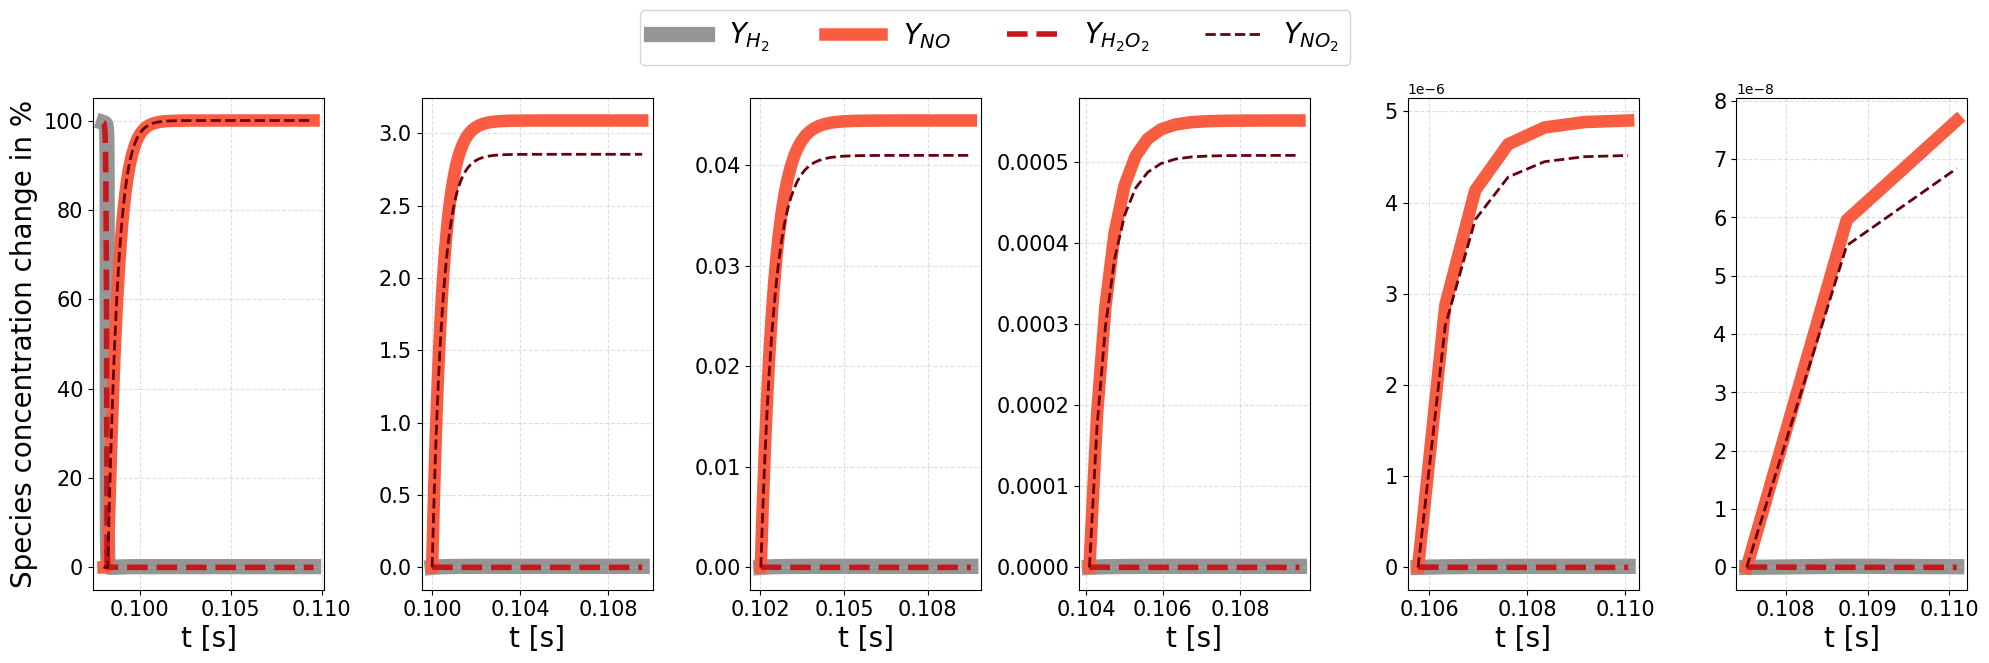

In [ ]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs time/"
name = f"Relative_change_species_endOfTraj_differentScales_together_colourTime - other colors.png"
namePdf = f"Relative_change_species_endOfTraj_differentScales_together_colourTime - other colors.pdf"

species_to_inspect = ['H2', 'NO', 'H2O2', 'NO2']  # Now looping over different species
colors = cm.get_cmap('Reds')(np.linspace(0.3, 1.0, len(species_to_inspect)))
greys = cm.get_cmap('Greys')
colors[0] = greys(0.5)
linewidthArray = [11, 9, 4, 2]
zorderArray = [1, 2, 3, 4]
linestyleArray = ["-", "-", "--", "--"]

timeCutoffArray = [0.098, 0.1, 0.102, 0.104, 0.106, 0.108]
nbr_test_trajectory = 4
rows, cols = 1, len(timeCutoffArray)

fig, axes = plt.subplots(rows, cols, figsize=(20, 6))
axes = axes.flatten()

# Load test trajectory
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns=state_space_names)

# Load time trajectory
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

legend_handles = []

for idxTimeCutoff, timeCutoff in enumerate(timeCutoffArray):
    test_trajectory_time_nonzero = test_trajectory_time[test_trajectory_time > timeCutoff]
    test_trajectory_nonzero = test_trajectory[test_trajectory_time > timeCutoff]

    ax = axes[idxTimeCutoff]

    for idxSp, species in enumerate(species_to_inspect):
        speciesTraj = test_trajectory_nonzero[species]
        scale = test_trajectory[test_trajectory_time > 0][species].max() - test_trajectory[test_trajectory_time > 0][species].min()
        speciesTraj_scaled = speciesTraj / scale
        speciesTraj_scaled -= speciesTraj_scaled.min()

        line, = ax.plot(
            test_trajectory_time_nonzero, speciesTraj_scaled*100,
            c=colors[idxSp], linewidth=linewidthArray[idxSp],
            zorder=zorderArray[idxSp], linestyle = linestyleArray[idxSp]
        )

        if idxTimeCutoff == 0:
            legend_label = f"$Y_{{{species.replace('2', '_{2}').replace('1', '_{source}')}}}$"
            legend_handles.append((line, legend_label))

    ax.tick_params(axis='y', labelsize=15)
    ax.tick_params(axis='x', labelsize=15)
    ax.set_xlabel("t [s]", fontsize=20)

    if idxTimeCutoff == 0:
        ax.set_ylabel("Species concentration change in %", fontsize=20)

    ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.3f'))
    ax.grid(True, linestyle='--', alpha=0.4)

if legend_handles:
    handles, labels = zip(*legend_handles)
    fig.legend(handles, labels, fontsize=20, ncol=len(species_to_inspect),
               loc="upper center", bbox_to_anchor=(0.5, 1.12), frameon=True)

plt.tight_layout()

if save:
    plt.savefig(pathSave + name, dpi=300)
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")
plt.show()

## Visualize a few species over time

C:\Windows\Temp\ipykernel_25912\2661104690.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('Reds')(np.linspace(0.3, 1.0, len(species_to_inspect)))
C:\Windows\Temp\ipykernel_25912\2661104690.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  greys = cm.get_cmap('Greys')


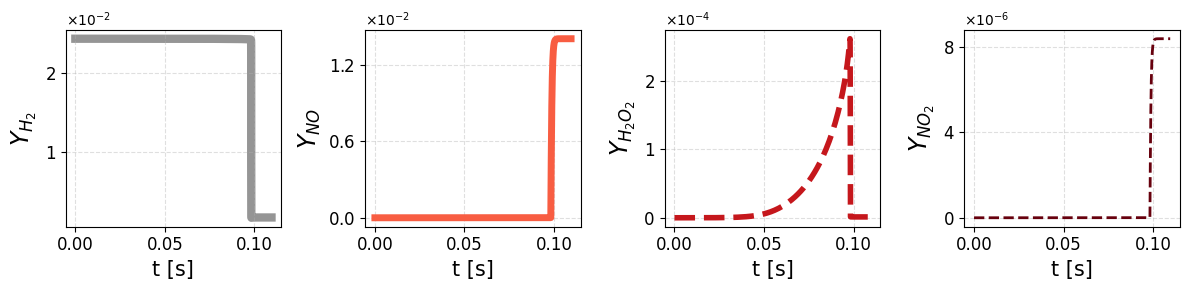

In [10]:
save = True
pathSave = "C:/Users/admin/Documents/Parente/Figures/2024-PV-optimization/Paper/Results/Effect log QoI/Species vs time/"
name = f"Species over time - autoignition - other colors.png"
namePdf = f"Species over time - autoignition - other colors.pdf"

species_to_inspect = ['H2', 'NO', 'H2O2', 'NO2']
colors = cm.get_cmap('Reds')(np.linspace(0.3, 1.0, len(species_to_inspect)))
greys = cm.get_cmap('Greys')
colors[0] = greys(0.5)
linewidthArray = [6, 5, 4, 2]
zorderArray = [1, 2, 3, 4]
linestyleArray = ["-", "-", "--", "--"]

nbr_test_trajectory = 4
rows, cols = 1, 4  # 2x2 subplot grid

# Load test trajectory
with h5py.File(f"{path_data_autoignition}{filename_autoignition}state-space-test-trajectories.h5", 'r') as hf:
    test_trajectory = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:], columns=state_space_names)

# Load time trajectory
with h5py.File(f"{path_data_autoignition}{filename_autoignition}time-test-trajectories.h5", 'r') as hf:
    test_trajectory_time = pd.DataFrame(hf[f'test_trajectory_{nbr_test_trajectory}'][:]).to_numpy()

# Mask for t > 0
mask_nonzero_time = test_trajectory_time > 0
test_trajectory_nonzero = test_trajectory[mask_nonzero_time]
test_trajectory_time_nonzero = test_trajectory_time[mask_nonzero_time]

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(12, 3))
axes = axes.flatten()

for idxSp, species in enumerate(species_to_inspect):
    ax = axes[idxSp]

    speciesTraj = test_trajectory_nonzero[species]
    ax.plot(
        test_trajectory_time_nonzero,
        speciesTraj,
        c=colors[idxSp],
        linewidth=linewidthArray[idxSp],
        zorder=zorderArray[idxSp],
        linestyle=linestyleArray[idxSp]
    )

    species_label = species.replace("2", "_{2}").replace("1", "_{source}")

    ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=3))
    formatter = ScalarFormatter(useMathText=True)
    formatter.set_powerlimits((0, 0))  # Always use scientific notation
    ax.yaxis.set_major_formatter(formatter)

    ax.set_xlabel("t [s]", fontsize=15)
    ax.set_xticks([0, 0.05, 0.1])

    ax.set_ylabel(f"$Y_{{{species_label}}}$", fontsize=17)
    ax.tick_params(axis='both', labelsize=12)
    ax.grid(True, linestyle='--', alpha=0.4)

    

plt.tight_layout()

# Save figure
if save:
    plt.savefig(pathSave + name, dpi=300)
    plt.savefig(pathSave + namePdf, bbox_inches = "tight")
plt.show()